Importing Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\91928\Documents\Instacart Basket Analysis\Data\Prepared Data'

In [5]:
#importing data
df_final = pd.read_pickle(os.path.join(path,'Final_Task4.9_final.pkl'),compression = 'infer')

In [6]:
#Display all columns
pd.options.display.max_columns = None

In [7]:
df_final.shape

(32641268, 28)

In [37]:
#all columns
df_final.columns

Index(['user_id', 'State', 'Age', 'Number_of_Dependants', 'Income',
       'product_id', 'product_name', 'prices', 'order_id', 'order_number',
       'order_day', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'Busiest Day', 'Busiest Days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'Spending Type', 'Median of days prior order', 'Customer Frequency',
       'Region', 'Exclusion Flag'],
      dtype='object')

In [9]:
#dropping unnecessary columns
df_final.drop(df_final.columns[df_final.columns.str.contains('Unnamed', case=False)], axis=1, inplace=True)

In [10]:
df_final = df_final.drop(columns = ['First Name','Gender'])

In [11]:
df_final = df_final.drop(columns = ['department_id'])

In [16]:
#frequency of different states in data
df_final['State'].value_counts(dropna = False).sort_index()

State
Alabama                 642694
Alaska                  653070
Arizona                 658597
Arkansas                640781
California              664472
Colorado                643864
Connecticut             627638
Delaware                641521
District of Columbia    618378
Florida                 633675
Georgia                 661136
Hawaii                  637490
Idaho                   611855
Illinois                637520
Indiana                 631835
Iowa                    630129
Kansas                  642064
Kentucky                636998
Louisiana               642222
Maine                   643218
Maryland                631316
Massachusetts           651063
Michigan                635680
Minnesota               652467
Mississippi             637173
Missouri                645366
Montana                 639881
Nebraska                630337
Nevada                  640740
New Hampshire           620019
New Jersey              632346
New Mexico              659231
Ne

In [15]:
#Creating Region

output = []
for x in df_final['State']:
    if (x == 'Connecticut') or (x == 'Maine') or ( x =='New Hampshire') or (x =='Vermont') or (x == 'Rhode Island') or (x =='Pennsylvania') or (x == 'New York') or (x == 'Massachusetts') or (x == 'New Jersey'):
        output.append('NorthEast')
    elif (x == 'Wisconsin') or (x=='Michigan') or (x == 'Illinois') or (x == 'Ohio') or (x =='Indiana') or (x =='South Dakota') or (x =='North Dakota') or (x == 'Nebraska') or (x == 'Minnesota') or (x =='Kansas') or (x == 'Missouri') or (x =='Iowa'):
        output.append('MidWest')
    elif (x == 'Delaware') or ( x == 'Maryland') or (x == 'District of Columbia') or ( x == 'Virginia') or (x =='West Virginia') or (x =='North Carolina') or (x == 'South Carolina') or (x =='Georgia') or (x =='Florida') or (x == 'Kentucky') or (x == 'Tennessee') or (x =='Mississippi') or (x == 'Alabama') or ( x =='Oklahoma') or (x == 'Texas') or (x == 'Arkansas') or ( x=='Louisiana'):
        output.append('South')
    ##elif x == ('Wyoming','Utah','Washington','Nevada','Montana','Oregon','Hawaii','California','Colorado','Idaho','Arizona','New Mexico','Alaska'):
        ##output.append('West')
    else:
        output.append('West')

In [21]:
output

['MidWest',
 'MidWest',
 'MidWest',
 'MidWest',
 'MidWest',
 'MidWest',
 'MidWest',
 'MidWest',
 'MidWest',
 'MidWest',
 'MidWest',
 'MidWest',
 'MidWest',
 'MidWest',
 'MidWest',
 'MidWest',
 'MidWest',
 'MidWest',
 'MidWest',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West'

In [17]:
# creating REGION column
df_final['Region'] = output

In [25]:
#frequency count of Region
df_final['Region'].value_counts()

Region
South        10870719
West          8353182
MidWest       7652535
NorthEast     5764832
Name: count, dtype: int64

In [19]:
#spending habits between the different U.S. regions.
crosstab = pd.crosstab(df_final['Region'],df_final['Spending Type'],dropna =True)

In [21]:
crosstab

Spending Type,Higher Spender,Low Spender
Region,,
MidWest,157347,7495188
NorthEast,109159,5655673
South,211695,10659024
West,161834,8191348


South Region have Higheet and lowet spending customers

In [29]:
#Create an exclusion flag for low-activity customers and exporting it
df_final.loc[df_final['max_order'] < 5 , 'Exclusion Flag'] = 'Exclude'
df_final.loc[df_final['max_order'] >= 5, 'Exclusion Flag'] = 'Include'

In [31]:
df_final['Exclusion Flag'].value_counts()

Exclusion Flag
Include    31929979
Exclude      711289
Name: count, dtype: int64

In [33]:
df_final_exclude = df_final[df_final['Exclusion Flag'] == 'Exclude']

In [25]:
df_final_exclude.shape

(711289, 26)

In [35]:
df_final_include = df_final[df_final['Exclusion Flag'] == 'Include']

In [37]:
df_final_include.shape

(31929979, 25)

In [35]:
df_final_include.head(10)

,user_id,State,Age,Number_of_Dependants,Income,product_id,product_name,department_id,prices,order_id,...,Busiest Days,busiest_period_of_day,max_order,loyalty_flag,average_price,Spending Type,Median of days prior order,Customer Frequency,Region,Exclusion Flag
0,26711.0,Missouri,48,3,165665,196.0,Soda,7.0,9.0,2543867.0,...,Busiests Days,Most orders,9.0,New customer,7.988889,Low Spender,20.0,Regular customer,MidWest,Include
1,26711.0,Missouri,48,3,165665,196.0,Soda,7.0,9.0,1285508.0,...,Regular Days,Most orders,9.0,New customer,7.988889,Low Spender,20.0,Regular customer,MidWest,Include
2,26711.0,Missouri,48,3,165665,196.0,Soda,7.0,9.0,2578584.0,...,Busiests Days,Most orders,9.0,New customer,7.988889,Low Spender,20.0,Regular customer,MidWest,Include
3,26711.0,Missouri,48,3,165665,6184.0,Clementines,4.0,4.3,518967.0,...,Regular Days,Most orders,9.0,New customer,7.988889,Low Spender,20.0,Regular customer,MidWest,Include
4,26711.0,Missouri,48,3,165665,6184.0,Clementines,4.0,4.3,2524893.0,...,Slowest Days,Most orders,9.0,New customer,7.988889,Low Spender,20.0,Regular customer,MidWest,Include
5,26711.0,Missouri,48,3,165665,6184.0,Clementines,4.0,4.3,2984525.0,...,Busiests Days,Average orders,9.0,New customer,7.988889,Low Spender,20.0,Regular customer,MidWest,Include
6,26711.0,Missouri,48,3,165665,6184.0,Clementines,4.0,4.3,2543867.0,...,Busiests Days,Most orders,9.0,New customer,7.988889,Low Spender,20.0,Regular customer,MidWest,Include
7,26711.0,Missouri,48,3,165665,6184.0,Clementines,4.0,4.3,2505178.0,...,Busiests Days,Average orders,9.0,New customer,7.988889,Low Spender,20.0,Regular customer,MidWest,Include
8,26711.0,Missouri,48,3,165665,6184.0,Clementines,4.0,4.3,1285508.0,...,Regular Days,Most orders,9.0,New customer,7.988889,Low Spender,20.0,Regular customer,MidWest,Include
9,26711.0,Missouri,48,3,165665,6184.0,Clementines,4.0,4.3,2578584.0,...,Busiests Days,Most orders,9.0,New customer,7.988889,Low Spender,20.0,Regular customer,MidWest,Include


In [41]:
crosstab_include_exclude = pd.crosstab(df_final['Exclusion Flag'],df_final['max_order'])

In [42]:
crosstab_include_exclude

max_order,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,73.0,74.0,75.0,76.0,77.0,78.0,79.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
Exclusion Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Exclude,711289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Include,0,773857,810010,825922,816445,822821,819874,781635,777159,751395,742552,739828,701339,660492,666463,625535,617509,598775,583788,596761,537086,532579,524512,505584,489933,463022,460786,460761,451153,426152,415367,419712,367476,400317,375995,349069,358737,368534,349227,332608,338220,335854,317737,318220,330420,293343,301445,335259,286514,285679,286438,240749,228292,237948,201199,193434,188822,192537,174717,164561,159846,161457,155161,134304,132575,126532,112175,104170,122273,100356,118169,115630,100033,88143,96640,93529,87900,80991,82537,66062,79419,82809,75275,64223,69886,65858,71650,48455,59467,55255,50497,52699,59965,40523,45019,44651,1173687


In [37]:
#Exporting High Activity customers for further analysis
df_final_include.to_pickle(os.path.join(path ,'High_activity_customers_updated.pkl'))

In [39]:
#importing high activity customers
df_instacart = pd.read_pickle(os.path.join(path,'High_activity_customers_updated.pkl'),compression = 'infer')

In [41]:
df_instacart.shape

(31929979, 26)

In [39]:
df_instacart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31929979 entries, 0 to 32641267
Data columns (total 26 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   user_id                     float64
 1   State                       string 
 2   Age                         int64  
 3   Number_of_Dependants        int64  
 4   Income                      int64  
 5   product_id                  object 
 6   product_name                object 
 7   department_id               object 
 8   prices                      float64
 9   order_id                    float64
 10  order_number                float64
 11  order_day                   float64
 12  order_hour_of_day           float64
 13  days_since_prior_order      float64
 14  add_to_cart_order           object 
 15  Busiest Day                 object 
 16  Busiest Days                object 
 17  busiest_period_of_day       object 
 18  max_order                   float64
 19  loyalty_flag            

In [39]:
df_instacart.columns

Index(['user_id', 'State', 'Age', 'Number_of_Dependants', 'Income',
       'product_id', 'product_name', 'prices', 'order_id', 'order_number',
       'order_day', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'Busiest Day', 'Busiest Days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'Spending Type', 'Median of days prior order', 'Customer Frequency',
       'Region', 'Exclusion Flag', 'Age_Group', 'Income_Group',
       'Dependent Flag'],
      dtype='object')

Creating customer profile based on Age

In [49]:
df_instacart['Age'].min()

18

In [138]:
df_instacart['Age'].max()

81

In [43]:
#Creating Age_Group column
df_instacart.loc[df_instacart['Age'] <= 25,'Age_Group'] = 'Young Adult'
df_instacart.loc[(df_instacart['Age'] >25) & (df_instacart['Age'] < 45),'Age_Group'] = 'Middle Age'
df_instacart.loc[(df_instacart['Age'] >= 45) & (df_instacart['Age'] < 65),'Age_Group'] = 'Senior Age'
df_instacart.loc[df_instacart['Age'] >= 65,'Age_Group'] = 'Older Age'

In [51]:
df_instacart['Age_Group'].value_counts(dropna = False)

Age_Group
Senior Age     9990825
Middle Age     9501783
Older Age      8450848
Young Adult    3986523
Name: count, dtype: int64

In [35]:
#Average buying price of different age group
df_instacart.groupby('Age_Group').agg({'average_price' : ['mean','max','min']})

average_price                      
                     mean           max     min
Age_Group                                      
Middle Age      11.805248  12506.925000  1.0000
Older Age       11.795582  14042.512281  1.2625
Senior Age      12.149934  15006.940000  1.0000
Young Adult     12.215307  10209.987755  1.3000

In [55]:
#details of days_since_prior_order of different age group
df_instacart.groupby('Age_Group').agg({'days_since_prior_order' : ['mean','max','min']})

days_since_prior_order           
                              mean   max  min
Age_Group                                    
Middle Age               10.376345  30.0  0.0
Older Age                10.344236  30.0  0.0
Senior Age               10.379550  30.0  0.0
Young Adult              10.352013  30.0  0.0

<Axes: xlabel='Age_Group'>

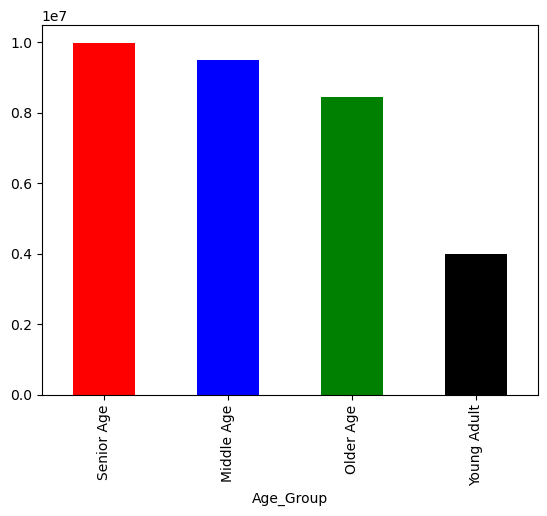

In [57]:
df_instacart['Age_Group'].value_counts().plot.bar(color = ['Red','Blue','Green','Black'])

Senior Age (between 45 and 65 years are the most customers 

Creating customer profile based on Income

In [58]:
df_instacart['Income'].agg(['max','min'])

max    593901
min     25903
Name: Income, dtype: int64

In [45]:
# Creating Income column
df_instacart.loc[df_instacart['Income'] < 50000, 'Income_Group'] = 'Low'
df_instacart.loc[(df_instacart['Income'] >= 50000) & (df_instacart['Income'] < 100000), 'Income_Group'] = 'Middle'
df_instacart.loc[df_instacart['Income'] >= 100000, 'Income_Group'] = 'High'

In [41]:
df_instacart_count = df_instacart['Income_Group'].value_counts()

In [59]:
#Average buying price of different Income group
df_instacart.groupby('Income_Group').agg({'average_price' : ['mean','max','min']})

average_price                   
                      mean           max  min
Income_Group                                 
High             16.542618  15006.940000  7.0
Low               6.701019     13.878571  1.0
Middle            8.447048   5135.893590  1.3

In [71]:
#details of days_since_prior_order of different Income group
df_instacart.groupby('Income_Group').agg({'days_since_prior_order' : ['mean','max','min']})

days_since_prior_order           
                               mean   max  min
Income_Group                                  
High                      10.322129  30.0  0.0
Low                       10.714044  30.0  0.0
Middle                    10.323488  30.0  0.0

<Axes: xlabel='Income_Group'>

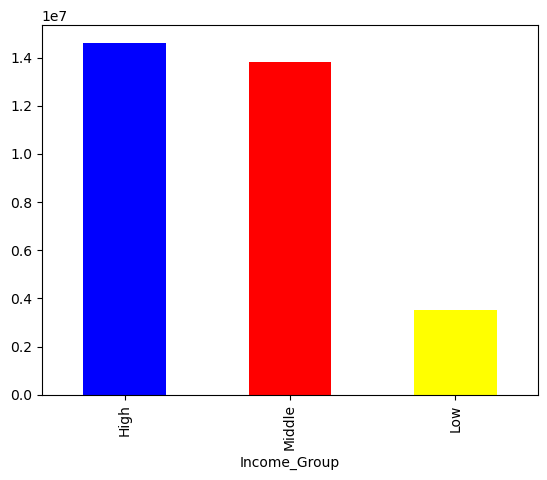

In [73]:
df_instacart['Income_Group'].value_counts().plot.bar(color = ['Blue','Red','Yellow'] ,label = 'Income_group' , )

High income group ( >$100000 ) are the instacart's customers

Creating customer profile based on Dependants

In [75]:
df_instacart['Number_of_Dependants'].value_counts()

Number_of_Dependants
3    8014062
0    7979527
2    7974823
1    7961567
Name: count, dtype: int64

In [47]:
# Creating Dependant column
df_instacart.loc[df_instacart['Number_of_Dependants'] == 0,'Dependent Flag'] = 'No Dependant'
df_instacart.loc[df_instacart['Number_of_Dependants'] >= 1,'Dependent Flag'] = 'Has Dependant'

In [79]:
df_instacart['Dependent Flag'].value_counts()

Dependent Flag
Has Dependant    23950452
No Dependant      7979527
Name: count, dtype: int64

In [103]:
df_instacart.groupby('Dependent Flag').agg({'average_price' : ['mean' ,'max','min']})

average_price                
                        mean        max  min
Dependent Flag                              
Has Dependant      11.918058  12506.925  1.0
No Dependant       12.092842  15006.940  1.0

In [83]:
df_instacart.groupby('Dependent Flag').agg({'days_since_prior_order' : ['mean','max','min']})

days_since_prior_order           
                                 mean   max  min
Dependent Flag                                  
Has Dependant               10.372145  30.0  0.0
No Dependant                10.346802  30.0  0.0

<Axes: xlabel='Dependent Flag'>

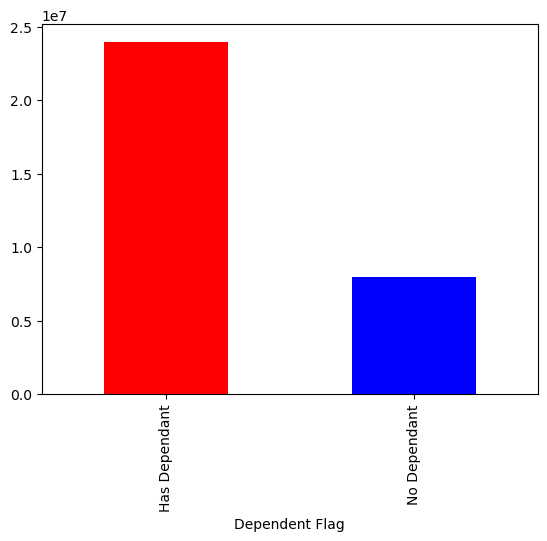

In [85]:
df_instacart['Dependent Flag'].value_counts().plot.bar(color = ['Red','Blue'],label = 'Number of Dependentd')

Most of the customers have one or more dependants

In [49]:
df_instacart = df_instacart.drop(columns = ['department_id'])

In [48]:
df_instacart['product_id'].value_counts()

product_id
24852.0    463436
13176.0    373251
21137.0    260533
21903.0    237020
47209.0    210428
            ...  
45400.0         1
14263.0         1
34463.0         1
42206.0         1
8435.0          1
Name: count, Length: 49663, dtype: int64

In [45]:
df_instacart.shape

(31929979, 28)

Since Dataframe instacart has more than 31 milllion rows,it is not compatible in my system ,so I am using random sampling to reduce my data size

In [51]:
#Random sampling
np.random.seed(4)
dev = np.random.rand(len(df_instacart)) <= 0.7

In [53]:
big =df_instacart[dev]

In [55]:
small = df_instacart[~dev]

In [63]:
small.shape

(9578802, 28)

In [49]:
big.shape

(22351177, 29)

I will be merging small sample with department data since big sample has more than 22 million data whereas small sample has only more than 9Lakh rows

In [57]:
df_instacart_small = small

In [59]:
df_instacart_small.columns

Index(['user_id', 'State', 'Age', 'Number_of_Dependants', 'Income',
       'product_id', 'product_name', 'prices', 'order_id', 'order_number',
       'order_day', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'Busiest Day', 'Busiest Days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_price',
       'Spending Type', 'Median of days prior order', 'Customer Frequency',
       'Region', 'Exclusion Flag', 'Age_Group', 'Income_Group',
       'Dependent Flag'],
      dtype='object')

In [61]:
df_instacart_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9578802 entries, 0 to 32641260
Data columns (total 28 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   user_id                     float64
 1   State                       string 
 2   Age                         int64  
 3   Number_of_Dependants        int64  
 4   Income                      int64  
 5   product_id                  object 
 6   product_name                object 
 7   prices                      float64
 8   order_id                    float64
 9   order_number                float64
 10  order_day                   float64
 11  order_hour_of_day           float64
 12  days_since_prior_order      float64
 13  add_to_cart_order           object 
 14  Busiest Day                 object 
 15  Busiest Days                object 
 16  busiest_period_of_day       object 
 17  max_order                   float64
 18  loyalty_flag                object 
 19  average_price            

In [63]:
df_instacart_small.shape

(9578802, 28)

In [ ]:
 #df_instacart.dropna(subset = ['product_id'],inplace = True)

In [65]:
df_instacart_small.drop(df_instacart_small.loc[df_instacart_small['product_id']=='Unknown'].index, inplace=True)

C:\Users\91928\AppData\Local\Temp\ipykernel_16064\2437140891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instacart_small.drop(df_instacart_small.loc[df_instacart_small['product_id']=='Unknown'].index, inplace=True)


In [67]:
df_instacart_small['product_id'] = df_instacart_small['product_id'].astype('int64')

C:\Users\91928\AppData\Local\Temp\ipykernel_16064\2159428540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instacart_small['product_id'] = df_instacart_small['product_id'].astype('int64')


Compare your customer profiles with regions and departments

In [107]:
# importing department data set
df_final_dept_prods = pd.read_pickle(os.path.join(path,'prods_dept_merge.pkl'))

In [125]:
df_final_dept_prods.shape

(49693, 4)

In [127]:
df_final_dept_prods.head(10)

,department_name,product_id,product_name,prices
0,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,10.5
1,frozen,8,Cut Russet Potatoes Steam N' Mash,1.1
2,frozen,12,Chocolate Fudge Layer Cake,9.4
3,frozen,18,Pizza for One Suprema Frozen Pizza,10.6
4,frozen,30,"Three Cheese Ziti, Marinara with Meatballs",13.8
5,frozen,36,Traditional Lasagna with Meat Sauce Savory Ita...,1.3
6,frozen,46,Raisin Cinnamon Bagels 5 count,14.6
7,frozen,81,Blakes Chicken Parmesan Dinner,9.4
8,frozen,100,Peanut Butter & Strawberry Jam Sandwich,4.7
9,frozen,118,Ground Turkey Chub,15.0


In [133]:
df_final_dept_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49693 entries, 0 to 49692
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   department_name  49693 non-null  object 
 1   product_id       49693 non-null  int64  
 2   product_name     49677 non-null  object 
 3   prices           49693 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


In [ ]:
df_final_dept_prods = df_final_dept_prods.drop(columns = ['aisle_id'])

In [ ]:
df_final_dept_prods = df_final_dept_prods.drop(columns = ['department_id'])

In [ ]:
df_final_dept_prods['product_id'] = df_final_dept_prods['product_id'].astype('int64')

In [79]:
df_final_dept_prods['product_id'].value_counts()

product_id
26808    2
35306    2
35491    2
6800     2
462      2
        ..
34250    1
34269    1
34273    1
34275    1
49669    1
Name: count, Length: 49686, dtype: int64

In [141]:
df_instacart_final = df_final_dept_prods.merge(df_instacart_small , on = ['product_id','product_name','prices'])

In [143]:
df_instacart_final.shape

(9515928, 29)

In [111]:
df_instacart_final.head(10)

,department_name,product_id,product_name,prices,user_id,State,Age,Number_of_Dependants,Income,order_id,...,loyalty_flag,average_price,Spending Type,Median of days prior order,Customer Frequency,Region,Exclusion Flag,Age_Group,Income_Group,Dependent Flag
0,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,10.5,4753.0,Florida,80,0,115100,2852282.0,...,New customer,7.830675,Low Spender,14.0,Regular customer,South,Include,Older Age,High,No Dependant
1,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,10.5,107462.0,California,28,3,57535,1891080.0,...,New customer,8.095973,Low Spender,26.0,Non-frequent customer,West,Include,Middle Age,Middle,Has Dependant
2,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,10.5,107462.0,California,28,3,57535,3109553.0,...,New customer,8.095973,Low Spender,26.0,Non-frequent customer,West,Include,Middle Age,Middle,Has Dependant
3,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,10.5,125164.0,Florida,28,1,57120,3091307.0,...,Regular customer,7.741481,Low Spender,11.0,Regular customer,South,Include,Middle Age,Middle,Has Dependant
4,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,10.5,125164.0,Florida,28,1,57120,833810.0,...,Regular customer,7.741481,Low Spender,11.0,Regular customer,South,Include,Middle Age,Middle,Has Dependant
5,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,10.5,80226.0,Arizona,65,2,106531,2668618.0,...,Regular customer,8.900000,Low Spender,11.0,Regular customer,West,Include,Older Age,High,Has Dependant
6,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,10.5,80226.0,Arizona,65,2,106531,1162662.0,...,Regular customer,8.900000,Low Spender,11.0,Regular customer,West,Include,Older Age,High,Has Dependant
7,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,10.5,53001.0,Hawaii,68,1,32742,3216194.0,...,Loyal customer,6.909043,Low Spender,1.0,Frequent customer,West,Include,Older Age,Low,Has Dependant
8,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,10.5,53001.0,Hawaii,68,1,32742,676595.0,...,Loyal customer,6.909043,Low Spender,1.0,Frequent customer,West,Include,Older Age,Low,Has Dependant
9,frozen,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,10.5,9257.0,New Mexico,77,1,52334,142706.0,...,Loyal customer,6.768127,Low Spender,7.0,Frequent customer,West,Include,Older Age,Middle,Has Dependant


In [135]:
df_instacart_final['department_name'].value_counts()

department_name
produce            2786363
dairy eggs         1587897
snacks              848469
beverages           790816
frozen              654015
pantry              549023
bakery              345061
canned goods        312926
deli                308304
dry goods pasta     253215
household           215745
meat seafood        207839
breakfast           207456
personal care       131015
babies              125263
international        78836
alcohol              44660
pets                 28366
missing              19908
other                10537
bulk                 10214
Name: count, dtype: int64

In [89]:
df_instacart_final.columns

Index(['department_name', 'product_id', 'product_name', 'prices', 'user_id',
       'State', 'Age', 'Number_of_Dependants', 'Income', 'order_id',
       'order_number', 'order_day', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'Busiest Day',
       'Busiest Days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'Spending Type', 'Median of days prior order',
       'Customer Frequency', 'Region', 'Exclusion Flag', 'Age_Group',
       'Income_Group', 'Dependent Flag'],
      dtype='object')

In [99]:
df_instacart_final.groupby('department_name').agg({'average_price' : ['mean' ,'max','min']})

average_price                        
                         mean           max       min
department_name                                      
alcohol             27.907321  14042.512281  2.046154
babies              10.224588   4768.028571  1.425000
bakery              13.272814  15006.940000  2.895652
beverages           12.762411  15006.940000  1.100000
breakfast           14.772349  10721.342857  2.172727
bulk                 8.648745   2496.148259  3.609091
canned goods        12.253834  10209.987755  1.200000
dairy eggs          12.467755  15006.940000  1.568750
deli                10.888605  10721.342857  2.100000
dry goods pasta     12.531536  14042.512281  2.611111
frozen              12.483682  15006.940000  1.845455
household           15.202489  15006.940000  1.000000
international       11.517489   4174.447917  3.010345
meat seafood        12.914858  15006.940000  3.476471
missing             11.811865   6390.138298  3.600000
other               14.025762   3427.008547  2.590909
pantry              12.550343  15006.940000  1.800000
personal care       13.527547   8794.882427  2.356522
pets                15.482635   6390.138298  3.954545
produce             10.398259  14042.512281  1.200000
snacks              11.655321  10721.342857  1.600000

In [117]:
df_instacart_final.groupby('department_name').agg({'days_since_prior_order' : ['mean' ,'max','min']})

days_since_prior_order           
                                  mean   max  min
department_name                                  
alcohol                       9.459561  30.0  0.0
babies                        9.420196  30.0  0.0
bakery                       10.315278  30.0  0.0
beverages                    10.303196  30.0  0.0
breakfast                    10.490706  30.0  0.0
bulk                          9.381046  30.0  0.0
canned goods                 10.799640  30.0  0.0
dairy eggs                   10.254789  30.0  0.0
deli                         10.525316  30.0  0.0
dry goods pasta              10.905894  30.0  0.0
frozen                       10.847111  30.0  0.0
household                    11.093351  30.0  0.0
international                10.404447  30.0  0.0
meat seafood                 10.622313  30.0  0.0
missing                       9.848403  30.0  0.0
other                        10.148334  30.0  0.0
pantry                       10.334004  30.0  0.0
personal care                10.687776  30.0  0.0
pets                         10.968554  30.0  0.0
produce                      10.123757  30.0  0.0
snacks                       10.216657  30.0  0.0

<Axes: xlabel='department_name'>

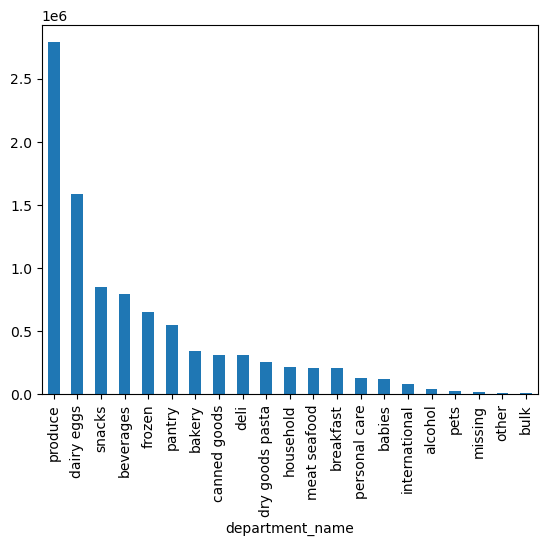

In [119]:
df_instacart_final['department_name'].value_counts().plot.bar()

Sales based on Region with respect to department_name

In [ ]:
df_instacart_final['department_name','Region'].value_counts().plot.bar()

In [93]:
region_dep = pd.crosstab(df_instacart_final['department_name'], df_instacart_final['Region'], dropna = False)

In [225]:
region_dep.sort_values(by = ['West'],ascending = [False])

Region,MidWest,NorthEast,South,West
department_name,,,,
produce,654979,488803,929752,712829
dairy eggs,372123,281275,527965,406534
snacks,198304,150538,281489,218138
beverages,183599,142371,264170,200676
frozen,153052,114474,218638,167851
pantry,129513,96031,181906,141573
bakery,80606,61169,114492,88794
canned goods,73341,54673,104859,80053
deli,72096,54707,102473,79028


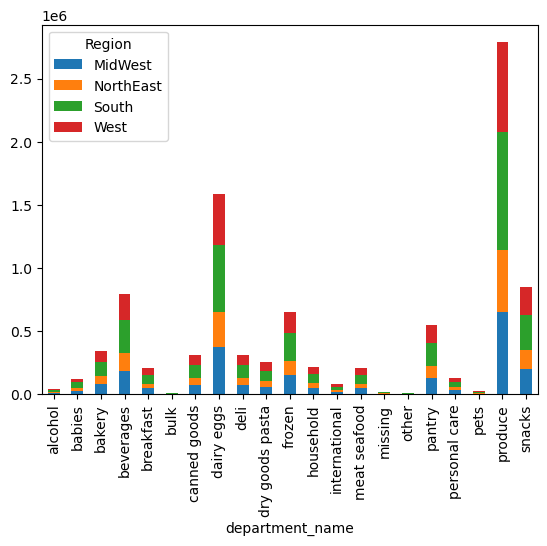

In [217]:
bar5 = region_dep.sort_index().plot(kind='bar', stacked =True)

Sales based on Age Group with respect to department_name

In [99]:
AgeGroup_dep = pd.crosstab(df_instacart_final['department_name'], df_instacart_final['Age_Group'], dropna = False)

In [229]:
AgeGroup_dep.sort_values(by = ['Middle Age'],ascending = [False])

Age_Group,Middle Age,Older Age,Senior Age,Young Adult
department_name,,,,
produce,832932,738731,869204,345496
dairy eggs,474841,420588,493480,198988
snacks,252871,223147,266546,105905
beverages,231705,210236,250605,98270
frozen,192777,173586,205479,82173
pantry,163229,145297,171911,68586
bakery,102675,90969,108309,43108
canned goods,93555,82575,97723,39073
deli,91945,81599,96321,38439


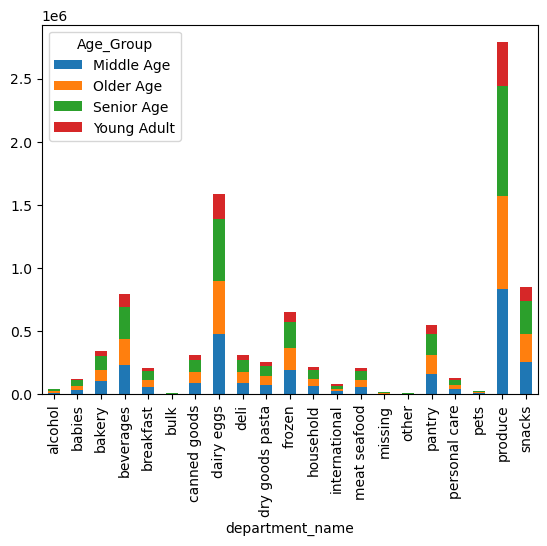

In [213]:
bar6 = AgeGroup_dep.plot(kind='bar', stacked =True)

Sales based on Income Group with respect to department_name

In [236]:
dept_income = pd.crosstab(df_instacart_final['department_name'],df_instacart_final['Income_Group'],dropna =True)

In [238]:
dept_income.sort_values(by = ['High'],ascending = [False])

Income_Group,High,Low,Middle
department_name,,,
produce,1298463,255759,1232141
dairy eggs,736672,155793,695432
beverages,345899,118290,326627
snacks,338612,172381,337476
frozen,303393,67379,283243
pantry,258313,51552,239158
bakery,162478,33111,149472
canned goods,149468,25101,138357
deli,141537,33112,133655


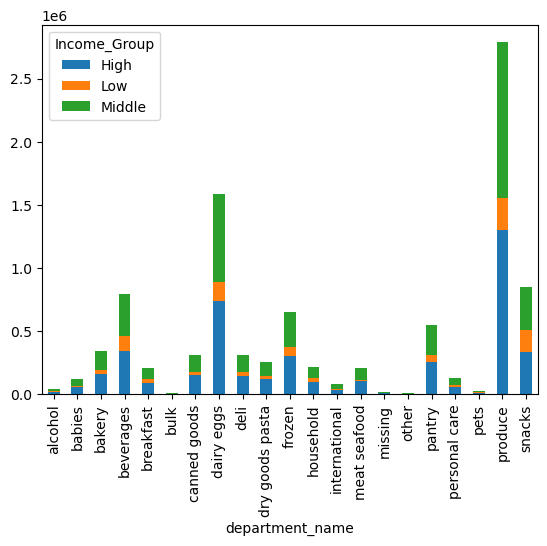

In [221]:
bar7 = dept_income.plot(kind='bar', stacked =True)